In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path of the dataset
task2_data ='/content/drive/My Drive/Colab Notebooks/data/Omdena/Task 2_Data.csv'

In [ ]:
# Import libraries
import pandas as pd

In [ ]:
# Import the data
# Prints the number of rows and columns of the dataset
task2_data_df = pd.read_csv(task2_data)

# csv data may have trailing and leading spaces, trimming whitespace from data elements
task2_data_df = task2_data_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#Prints row and columns
num_row, num_col = task2_data_df.shape
print(f'There are {num_row} row(s) and {num_col} column(s)')

# Removing empty rows from csv if any
task2_data_df.dropna(axis=0, how='all',inplace=True)

# Prints first 5 rows of the DataFrame
task2_data_df.head(5)

There are 12 row(s) and 4 column(s)


,Case,Background information,Service Requested,Current Situation/HomeStudy
0,A,Amira’s mother left her daughter at an orphana...,Amira would like to get in contact with her bi...,"Accordingly, she is asking for the time being ..."
1,B,The Social Worker who made the child welfare a...,The Youth Welfare Office of Potsdam has been a...,The family left Ms. Amani’s house few days ago...
2,C,I hope you all are well and sane in these chal...,Anas has an expired German passport but he cl...,Anas is a 16-year-old teenager who lives with ...
3,D,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...",To locate Mr. Ali’s daughter and ensure that M...,The father called informing that his former wi...
4,E,Carol and Fadi are in a long term foster place...,Children’s Services are seeking your cooperati...,Carol and Fadi are settled in their placement ...


In [ ]:
# Basic info about the dataset
task2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Case                         5 non-null      object
 1   Background information       5 non-null      object
 2   Service Requested            5 non-null      object
 3   Current Situation/HomeStudy  5 non-null      object
dtypes: object(4)
memory usage: 200.0+ bytes


In [ ]:
# Checking for null values
task2_data_df.isnull().sum()

Case                           0
Background information         0
Service Requested              0
Current Situation/HomeStudy    0
dtype: int64

In [ ]:
# Focusing on Background information column

background_df = task2_data_df['Background information']
background_df

0    Amira’s mother left her daughter at an orphana...
1    The Social Worker who made the child welfare a...
2    I hope you all are well and sane in these chal...
3    Mr. Ali and Mrs. Leila, Syrian nationals, got ...
4    Carol and Fadi are in a long term foster place...
Name: Background information, dtype: object

In [ ]:
# Convert the Background information column data into dataframe
background_df = background_df.to_frame()
background_df

,Background information
0,Amira’s mother left her daughter at an orphana...
1,The Social Worker who made the child welfare a...
2,I hope you all are well and sane in these chal...
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ..."
4,Carol and Fadi are in a long term foster place...


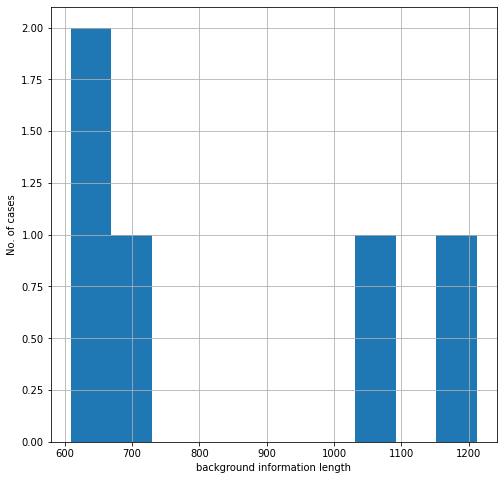

In [ ]:
# Visualizing background information length
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.xlabel("background information length")
plt.ylabel("No. of cases")

background_df['Background information'].str.len().hist()

# Pre-Processing

In [ ]:
# Contraction Mapping

!pip install contractions
import contractions

In [ ]:
# Applying contraction mapping -Expand Contractions

background_df['no_contract'] = background_df['Background information'].apply(lambda x: [contractions.fix(word) for word in x.split()])
background_df

,Background information,no_contract
0,Amira’s mother left her daughter at an orphana...,"[Amira’s, mother, left, her, daughter, at, an,..."
1,The Social Worker who made the child welfare a...,"[The, Social, Worker, who, made, the, child, w..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ..."
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...","[Mr., Ali, and, Mrs., Leila,, Syrian, national..."
4,Carol and Fadi are in a long term foster place...,"[Carol, and, Fadi, are, in, a, long, term, fos..."


In [ ]:
# Joining the list of items back into one string

background_df['background_information_str'] = [' '.join(map(str, l)) for l in background_df['no_contract']]
background_df

,Background information,no_contract,background_information_str
0,Amira’s mother left her daughter at an orphana...,"[Amira’s, mother, left, her, daughter, at, an,...",Amira’s mother left her daughter at an orphana...
1,The Social Worker who made the child welfare a...,"[The, Social, Worker, who, made, the, child, w...",The Social Worker who made the child welfare a...
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...","[Mr., Ali, and, Mrs., Leila,, Syrian, national...","Mr. Ali and Mrs. Leila, Syrian nationals, got ..."
4,Carol and Fadi are in a long term foster place...,"[Carol, and, Fadi, are, in, a, long, term, fos...",Carol and Fadi are in a long term foster place...


In [ ]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
background_df['lower_case'] = background_df['background_information_str'].str.lower()
background_df['no_punc'] = background_df['lower_case'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

background_df

,Background information,no_contract,background_information_str,lower_case,no_punc
0,Amira’s mother left her daughter at an orphana...,"[Amira’s, mother, left, her, daughter, at, an,...",Amira’s mother left her daughter at an orphana...,amira’s mother left her daughter at an orphana...,amiras mother left her daughter at an orphanag...
1,The Social Worker who made the child welfare a...,"[The, Social, Worker, who, made, the, child, w...",The Social Worker who made the child welfare a...,the social worker who made the child welfare a...,the social worker who made the child welfare a...
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...","[Mr., Ali, and, Mrs., Leila,, Syrian, national...","Mr. Ali and Mrs. Leila, Syrian nationals, got ...","mr. ali and mrs. leila, syrian nationals, got ...",mr ali and mrs leila syrian nationals got marr...
4,Carol and Fadi are in a long term foster place...,"[Carol, and, Fadi, are, in, a, long, term, fos...",Carol and Fadi are in a long term foster place...,carol and fadi are in a long term foster place...,carol and fadi are in a long term foster place...



Regex explanation:

* [^] matches everything but everything inside the blockquotes
* \w matches any word character (equal to [a-zA-Z0-9_])
* \d matches a digit (equal to [0-9])
* \s matches any whitespace character (equal to [\r\n\t\f\v ])
* \' matches the character ' literally (case sensitive)
* '+' matches between one and unlimited times, as many times as possible, giving back as needed


In [ ]:
# Using nltk for tokenization, hoping to use spacy instead 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# nltk tokenization
background_df['tokenized'] = background_df['no_punc'].apply(word_tokenize)
background_df['tokenized']

0    [amiras, mother, left, her, daughter, at, an, ...
1    [the, social, worker, who, made, the, child, w...
2    [i, hope, you, all, are, well, and, sane, in, ...
3    [mr, ali, and, mrs, leila, syrian, nationals, ...
4    [carol, and, fadi, are, in, a, long, term, fos...
Name: tokenized, dtype: object

In [ ]:
# Initializing Stop words libraries to filter the English stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


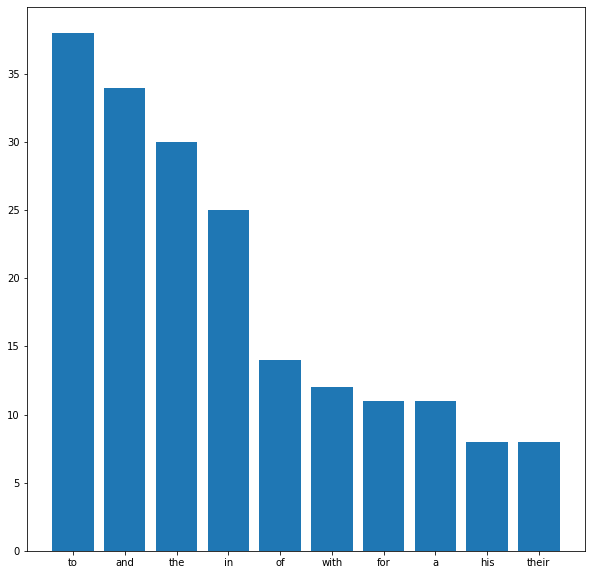

In [ ]:
# Plotting top stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(background_df['Background information'])

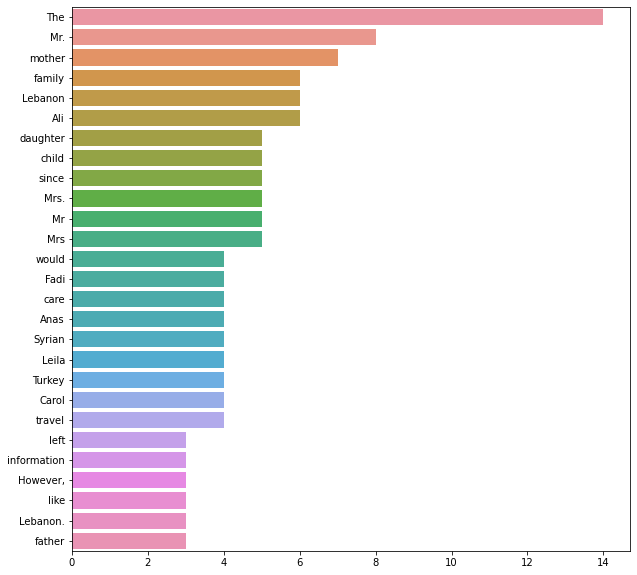

In [ ]:
# Plotting top non stopwords
import seaborn as sns
from collections import Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(background_df['Background information'])

In [ ]:
# Remove stopwords 

background_df['stopwords_removed'] = background_df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Part of Speech Tagging
background_df['pos_tags'] = background_df['stopwords_removed'].apply(nltk.tag.pos_tag)
background_df.head()


,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags
0,Amira’s mother left her daughter at an orphana...,"[Amira’s, mother, left, her, daughter, at, an,...",Amira’s mother left her daughter at an orphana...,amira’s mother left her daughter at an orphana...,amiras mother left her daughter at an orphanag...,"[amiras, mother, left, her, daughter, at, an, ...","[amiras, mother, left, daughter, orphanage, be...","[(amiras, NNS), (mother, RBR), (left, JJ), (da..."
1,The Social Worker who made the child welfare a...,"[The, Social, Worker, who, made, the, child, w...",The Social Worker who made the child welfare a...,the social worker who made the child welfare a...,the social worker who made the child welfare a...,"[the, social, worker, who, made, the, child, w...","[social, worker, made, child, welfare, alert, ...","[(social, JJ), (worker, NN), (made, VBD), (chi..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng..."
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...","[Mr., Ali, and, Mrs., Leila,, Syrian, national...","Mr. Ali and Mrs. Leila, Syrian nationals, got ...","mr. ali and mrs. leila, syrian nationals, got ...",mr ali and mrs leila syrian nationals got marr...,"[mr, ali, and, mrs, leila, syrian, nationals, ...","[mr, ali, mrs, leila, syrian, nationals, got, ...","[(mr, NN), (ali, NN), (mrs, NN), (leila, NN), ..."
4,Carol and Fadi are in a long term foster place...,"[Carol, and, Fadi, are, in, a, long, term, fos...",Carol and Fadi are in a long term foster place...,carol and fadi are in a long term foster place...,carol and fadi are in a long term foster place...,"[carol, and, fadi, are, in, a, long, term, fos...","[carol, fadi, long, term, foster, placement, m...","[(carol, NN), (fadi, NN), (long, JJ), (term, N..."


In [ ]:
# Initializing wordnet libraries
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Parts of Speech Tagging

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
        
background_df['wordnet_pos'] = background_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
background_df.head()

,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags,wordnet_pos
0,Amira’s mother left her daughter at an orphana...,"[Amira’s, mother, left, her, daughter, at, an,...",Amira’s mother left her daughter at an orphana...,amira’s mother left her daughter at an orphana...,amiras mother left her daughter at an orphanag...,"[amiras, mother, left, her, daughter, at, an, ...","[amiras, mother, left, daughter, orphanage, be...","[(amiras, NNS), (mother, RBR), (left, JJ), (da...","[(amiras, n), (mother, r), (left, a), (daughte..."
1,The Social Worker who made the child welfare a...,"[The, Social, Worker, who, made, the, child, w...",The Social Worker who made the child welfare a...,the social worker who made the child welfare a...,the social worker who made the child welfare a...,"[the, social, worker, who, made, the, child, w...","[social, worker, made, child, welfare, alert, ...","[(social, JJ), (worker, NN), (made, VBD), (chi...","[(social, a), (worker, n), (made, v), (child, ..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng...","[(hope, n), (well, r), (sane, r), (challenging..."
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...","[Mr., Ali, and, Mrs., Leila,, Syrian, national...","Mr. Ali and Mrs. Leila, Syrian nationals, got ...","mr. ali and mrs. leila, syrian nationals, got ...",mr ali and mrs leila syrian nationals got marr...,"[mr, ali, and, mrs, leila, syrian, nationals, ...","[mr, ali, mrs, leila, syrian, nationals, got, ...","[(mr, NN), (ali, NN), (mrs, NN), (leila, NN), ...","[(mr, n), (ali, n), (mrs, n), (leila, n), (syr..."
4,Carol and Fadi are in a long term foster place...,"[Carol, and, Fadi, are, in, a, long, term, fos...",Carol and Fadi are in a long term foster place...,carol and fadi are in a long term foster place...,carol and fadi are in a long term foster place...,"[carol, and, fadi, are, in, a, long, term, fos...","[carol, fadi, long, term, foster, placement, m...","[(carol, NN), (fadi, NN), (long, JJ), (term, N...","[(carol, n), (fadi, n), (long, a), (term, n), ..."


In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
background_df['lemmatized'] = background_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
background_df.head()

,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Amira’s mother left her daughter at an orphana...,"[Amira’s, mother, left, her, daughter, at, an,...",Amira’s mother left her daughter at an orphana...,amira’s mother left her daughter at an orphana...,amiras mother left her daughter at an orphanag...,"[amiras, mother, left, her, daughter, at, an, ...","[amiras, mother, left, daughter, orphanage, be...","[(amiras, NNS), (mother, RBR), (left, JJ), (da...","[(amiras, n), (mother, r), (left, a), (daughte...","[amiras, mother, left, daughter, orphanage, be..."
1,The Social Worker who made the child welfare a...,"[The, Social, Worker, who, made, the, child, w...",The Social Worker who made the child welfare a...,the social worker who made the child welfare a...,the social worker who made the child welfare a...,"[the, social, worker, who, made, the, child, w...","[social, worker, made, child, welfare, alert, ...","[(social, JJ), (worker, NN), (made, VBD), (chi...","[(social, a), (worker, n), (made, v), (child, ...","[social, worker, make, child, welfare, alert, ..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng...","[(hope, n), (well, r), (sane, r), (challenging...","[hope, well, sane, challenge, time, kindly, as..."
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...","[Mr., Ali, and, Mrs., Leila,, Syrian, national...","Mr. Ali and Mrs. Leila, Syrian nationals, got ...","mr. ali and mrs. leila, syrian nationals, got ...",mr ali and mrs leila syrian nationals got marr...,"[mr, ali, and, mrs, leila, syrian, nationals, ...","[mr, ali, mrs, leila, syrian, nationals, got, ...","[(mr, NN), (ali, NN), (mrs, NN), (leila, NN), ...","[(mr, n), (ali, n), (mrs, n), (leila, n), (syr...","[mr, ali, mr, leila, syrian, national, get, ma..."
4,Carol and Fadi are in a long term foster place...,"[Carol, and, Fadi, are, in, a, long, term, fos...",Carol and Fadi are in a long term foster place...,carol and fadi are in a long term foster place...,carol and fadi are in a long term foster place...,"[carol, and, fadi, are, in, a, long, term, fos...","[carol, fadi, long, term, foster, placement, m...","[(carol, NN), (fadi, NN), (long, JJ), (term, N...","[(carol, n), (fadi, n), (long, a), (term, n), ...","[carol, fadi, long, term, foster, placement, m..."


In [ ]:
# Join strings together 

background_df['tokenized_Background information_join'] = [' '.join(map(str, l)) for l in background_df['lemmatized']]
background_df


,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,tokenized_Background information_join
0,Amira’s mother left her daughter at an orphana...,"[Amira’s, mother, left, her, daughter, at, an,...",Amira’s mother left her daughter at an orphana...,amira’s mother left her daughter at an orphana...,amiras mother left her daughter at an orphanag...,"[amiras, mother, left, her, daughter, at, an, ...","[amiras, mother, left, daughter, orphanage, be...","[(amiras, NNS), (mother, RBR), (left, JJ), (da...","[(amiras, n), (mother, r), (left, a), (daughte...","[amiras, mother, left, daughter, orphanage, be...",amiras mother left daughter orphanage beirut c...
1,The Social Worker who made the child welfare a...,"[The, Social, Worker, who, made, the, child, w...",The Social Worker who made the child welfare a...,the social worker who made the child welfare a...,the social worker who made the child welfare a...,"[the, social, worker, who, made, the, child, w...","[social, worker, made, child, welfare, alert, ...","[(social, JJ), (worker, NN), (made, VBD), (chi...","[(social, a), (worker, n), (made, v), (child, ...","[social, worker, make, child, welfare, alert, ...",social worker make child welfare alert respons...
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng...","[(hope, n), (well, r), (sane, r), (challenging...","[hope, well, sane, challenge, time, kindly, as...",hope well sane challenge time kindly ask suppo...
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...","[Mr., Ali, and, Mrs., Leila,, Syrian, national...","Mr. Ali and Mrs. Leila, Syrian nationals, got ...","mr. ali and mrs. leila, syrian nationals, got ...",mr ali and mrs leila syrian nationals got marr...,"[mr, ali, and, mrs, leila, syrian, nationals, ...","[mr, ali, mrs, leila, syrian, nationals, got, ...","[(mr, NN), (ali, NN), (mrs, NN), (leila, NN), ...","[(mr, n), (ali, n), (mrs, n), (leila, n), (syr...","[mr, ali, mr, leila, syrian, national, get, ma...",mr ali mr leila syrian national get married 20...
4,Carol and Fadi are in a long term foster place...,"[Carol, and, Fadi, are, in, a, long, term, fos...",Carol and Fadi are in a long term foster place...,carol and fadi are in a long term foster place...,carol and fadi are in a long term foster place...,"[carol, and, fadi, are, in, a, long, term, fos...","[carol, fadi, long, term, foster, placement, m...","[(carol, NN), (fadi, NN), (long, JJ), (term, N...","[(carol, n), (fadi, n), (long, a), (term, n), ...","[carol, fadi, long, term, foster, placement, m...",carol fadi long term foster placement mr mr ch...


In [ ]:
# TF-IDF - “Term Frequency — Inverse Data Frequency
# https://towardsdatascience.com/a-gentle-introduction-to-calculating-the-tf-idf-values-9e391f8a13e5
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# tfidf calculation - relevant words 
text_content = background_df['tokenized_Background information_join']
vector = TfidfVectorizer()
tfidf_subset = vector.fit_transform(text_content)

In [ ]:
# Each column represents a unique word in the document in alphabetical order
import numpy as np
tfidf_subset = tfidf_subset.toarray()

vocab = vector.get_feature_names()
tfidf_df = pd.DataFrame(np.round(tfidf_subset, 3), columns=vocab)
tfidf_df

,14,2009,2010,2013,2014,2015,2017,30062004,3152018,able,accord,activity,addict,address,age,alaytam,alert,ali,alislamiyya,amira,amiras,ana,anas,arrest,ask,attend,authorise,authority,away,back,beirut,berlin,biological,bromley,call,canada,cancel,care,carers,carol,...,state,stay,still,substitute,substitution,support,sure,syria,syrian,take,term,territory,terrorist,therefore,time,together,totally,travel,trip,try,turkey,turn,two,uk,unhcr,university,upbringing,use,visit,visited,want,war,website,welfare,well,wife,wish,worker,would,year
0,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.115,0.000,0.000,0.000,0.115,0.115,0.000,0.000,0.115,0.229,0.115,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.115,0.000,0.229,0.000,0.115,0.115,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.115,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.000,0.229,0.00,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.077,0.077
1,0.113,0.000,0.000,0.00,0.091,0.00,0.113,0.000,0.00,0.00,0.000,0.000,0.113,0.000,0.000,0.000,0.225,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.113,0.000,0.00,0.00,0.075,0.000,0.113,0.000,0.000,0.000,0.000,0.113,0.091,0.000,0.000,...,0.091,0.000,0.000,0.113,0.113,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.113,0.000,0.00,0.000,0.00,0.000,0.225,0.091,0.000,0.000,0.113,0.000,0.302
2,0.000,0.118,0.095,0.00,0.000,0.00,0.000,0.118,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.354,0.236,0.00,0.095,0.000,0.000,0.00,0.00,0.079,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.118,0.000,0.000,0.118,0.000,0.191,0.000,0.00,0.000,0.00,0.000,0.000,0.095,0.118,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.095,0.000,0.000,0.000,0.158,0.000
3,0.000,0.000,0.049,0.06,0.049,0.06,0.000,0.000,0.06,0.06,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.362,0.000,0.000,0.000,0.000,0.000,0.06,0.097,0.000,0.000,0.06,0.06,0.040,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.049,0.000,0.000,0.000,0.000,0.000,0.146,0.241,0.06,0.000,0.06,0.000,0.000,0.049,0.000,0.06,0.00,0.000,0.06,0.302,0.06,0.06,0.000,0.000,0.06,0.000,0.000,0.146,0.06,0.000,0.06,0.000,0.000,0.000,0.121,0.000,0.000,0.000,0.040
4,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.000,0.066,0.000,0.066,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.198,0.00,0.00,0.000,0.000,0.000,0.000,0.132,0.000,0.000,0.000,0.160,0.066,0.264,...,0.053,0.053,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.132,0.00,0.066,0.066,0.000,0.000,0.00,0.33,0.066,0.00,0.000,0.00,0.00,0.066,0.000,0.00,0.066,0.000,0.053,0.00,0.066,0.00,0.066,0.000,0.000,0.000,0.066,0.000,0.044,0.000


In [ ]:
# Print all the vocabularies used in the document
print(vocab)

['14', '2009', '2010', '2013', '2014', '2015', '2017', '30062004', '3152018', 'able', 'accord', 'activity', 'addict', 'address', 'age', 'alaytam', 'alert', 'ali', 'alislamiyya', 'amira', 'amiras', 'ana', 'anas', 'arrest', 'ask', 'attend', 'authorise', 'authority', 'away', 'back', 'beirut', 'berlin', 'biological', 'bromley', 'call', 'canada', 'cancel', 'care', 'carers', 'carol', 'case', 'center', 'challenge', 'child', 'childrens', 'citizenship', 'come', 'conflict', 'constantly', 'consume', 'contact', 'convince', 'country', 'court', 'custody', 'dar', 'daughter', 'decide', 'decision', 'departure', 'deport', 'descent', 'disabled', 'divorce', 'divorced', 'dob', 'due', 'enforces', 'enough', 'ensure', 'fadi', 'family', 'father', 'first', 'follow', 'foster', 'free', 'friend', 'friends', 'general', 'german', 'germany', 'get', 'go', 'government', 'grandmother', 'guardian', 'hamburg', 'hence', 'heroine', 'hold', 'home', 'hope', 'however', 'incarceration', 'include', 'information', 'invite', 'invo

**Document Similarity**

* Cosine Similarity
* Document Clustering

In [ ]:
# Print out the conent of tfidf_subset
tfidf_subset

array([[0.        , 0.        , 0.        , ..., 0.        , 0.07671344,
        0.07671344],
       [0.11268906, 0.        , 0.        , ..., 0.11268906, 0.        ,
        0.3018767 ],
       [0.        , 0.11813374, 0.09530955, ..., 0.        , 0.15823108,
        0.        ],
       [0.        , 0.        , 0.04866366, ..., 0.        , 0.        ,
        0.04039523],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04426277,
        0.        ]])

**Cosine Similarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_content = cosine_similarity(tfidf_subset, tfidf_subset)
cosine_content

array([[1.        , 0.05451011, 0.14936495, 0.03616896, 0.05417145],
       [0.05451011, 1.        , 0.13420432, 0.04885544, 0.12202059],
       [0.14936495, 0.13420432, 1.        , 0.0816176 , 0.04493142],
       [0.03616896, 0.04885544, 0.0816176 , 1.        , 0.29135115],
       [0.05417145, 0.12202059, 0.04493142, 0.29135115, 1.        ]])

**Document Clustering** - Hierarchy

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(cosine_content, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,3,4,1.00568,2
1,0,2,1.20651,2
2,1,6,1.31156,3
3,5,7,1.57359,5


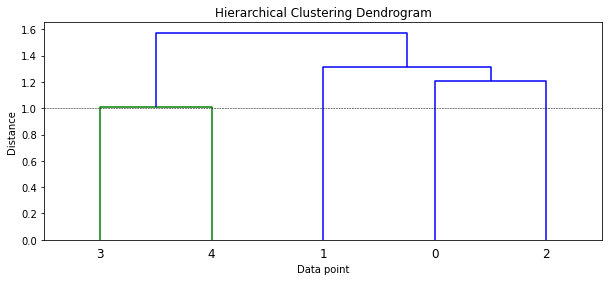

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([background_df, cluster_labels], axis=1)

,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,tokenized_Background information_join,ClusterLabel
0,Amira’s mother left her daughter at an orphana...,"[Amira’s, mother, left, her, daughter, at, an,...",Amira’s mother left her daughter at an orphana...,amira’s mother left her daughter at an orphana...,amiras mother left her daughter at an orphanag...,"[amiras, mother, left, her, daughter, at, an, ...","[amiras, mother, left, daughter, orphanage, be...","[(amiras, NNS), (mother, RBR), (left, JJ), (da...","[(amiras, n), (mother, r), (left, a), (daughte...","[amiras, mother, left, daughter, orphanage, be...",amiras mother left daughter orphanage beirut c...,3
1,The Social Worker who made the child welfare a...,"[The, Social, Worker, who, made, the, child, w...",The Social Worker who made the child welfare a...,the social worker who made the child welfare a...,the social worker who made the child welfare a...,"[the, social, worker, who, made, the, child, w...","[social, worker, made, child, welfare, alert, ...","[(social, JJ), (worker, NN), (made, VBD), (chi...","[(social, a), (worker, n), (made, v), (child, ...","[social, worker, make, child, welfare, alert, ...",social worker make child welfare alert respons...,5
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng...","[(hope, n), (well, r), (sane, r), (challenging...","[hope, well, sane, challenge, time, kindly, as...",hope well sane challenge time kindly ask suppo...,4
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...","[Mr., Ali, and, Mrs., Leila,, Syrian, national...","Mr. Ali and Mrs. Leila, Syrian nationals, got ...","mr. ali and mrs. leila, syrian nationals, got ...",mr ali and mrs leila syrian nationals got marr...,"[mr, ali, and, mrs, leila, syrian, nationals, ...","[mr, ali, mrs, leila, syrian, nationals, got, ...","[(mr, NN), (ali, NN), (mrs, NN), (leila, NN), ...","[(mr, n), (ali, n), (mrs, n), (leila, n), (syr...","[mr, ali, mr, leila, syrian, national, get, ma...",mr ali mr leila syrian national get married 20...,1
4,Carol and Fadi are in a long term foster place...,"[Carol, and, Fadi, are, in, a, long, term, fos...",Carol and Fadi are in a long term foster place...,carol and fadi are in a long term foster place...,carol and fadi are in a long term foster place...,"[carol, and, fadi, are, in, a, long, term, fos...","[carol, fadi, long, term, foster, placement, m...","[(carol, NN), (fadi, NN), (long, JJ), (term, N...","[(carol, n), (fadi, n), (long, a), (term, n), ...","[carol, fadi, long, term, foster, placement, m...",carol fadi long term foster placement mr mr ch...,2


K-Means Clustering - Applying GloVe 

In [ ]:
!pip install spacy
!python -m spacy download en_vectors_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


Click on "Runtime" on top -- "Restart Runtime" -- Then run the below cell - otherwise you will get an error

In [ ]:
import spacy
nlp = spacy.load('en_vectors_web_lg')
nlp

In [ ]:
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 1070971


In [ ]:

unique_words = list(set([word for sublist in [doc.split() for doc in background_df['Background information'][:100]] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
d.o.b.,0.285045,0.441420,0.339965,-0.425245,0.116915,0.272525,0.174620,-0.238145,-0.121465,0.121850,-0.132090,0.582735,-0.252565,-0.044852,-0.114116,0.322098,0.332644,0.169400,0.032295,0.311352,0.061560,0.250212,0.197052,0.017640,0.140431,-0.337470,0.065875,0.064366,-0.089245,0.127996,0.219302,-0.171825,-0.113550,-0.083360,-0.092190,0.419974,0.146053,-0.119055,-0.107495,0.141549,...,-0.101958,0.383430,0.090522,0.016245,-0.410815,-0.061650,-0.002255,-0.007004,0.212585,-0.101865,0.243960,0.377968,0.165564,0.447010,-0.410300,0.094621,0.189255,-0.083970,0.055760,0.004615,0.427760,-0.511165,0.025772,-0.503935,0.049515,0.209783,-0.217860,0.041535,0.322300,-0.041220,0.074300,-0.386418,-0.393340,-0.008098,0.279305,0.019209,0.177555,0.392305,-0.418355,-0.085355
Al-Islamiyya,-0.364320,0.129490,-0.032573,0.144478,0.073435,0.041849,0.209017,0.197477,-0.148933,0.735637,-0.215770,0.257193,0.014110,-0.256553,-0.254743,-0.069536,-0.107000,0.827333,-0.004827,-0.077438,-0.023834,-0.086188,-0.018981,0.103253,0.197853,0.048187,-0.285677,0.098319,0.343397,0.257281,-0.022030,0.176677,-0.029452,0.100267,0.050307,0.095087,0.131367,0.156823,-0.194013,0.094920,...,-0.084221,-0.105910,0.067983,0.205370,-0.095943,-0.257327,0.155523,-0.095103,-0.126977,0.199973,0.039802,-0.047157,-0.191240,0.214750,-0.168442,0.037498,0.188233,-0.356693,-0.083802,0.487237,0.312110,-0.234383,-0.001024,-0.113850,-0.108463,-0.003970,0.394190,0.162725,0.016955,0.066069,0.090147,0.040762,-0.268654,-0.187087,0.423590,0.021943,0.337087,-0.088794,0.015410,0.040160
consuming,-0.517450,-0.170160,0.483920,0.258900,-0.545130,0.565310,0.143090,0.160940,-0.249800,1.435000,-0.247620,-0.003392,-0.374590,0.179730,-0.178990,-0.706580,-0.218270,1.387400,-0.106610,0.448300,0.123900,-0.311130,-0.539400,-0.454110,-0.695770,-0.283880,0.584240,-0.489020,0.041359,-0.422680,-0.220230,-0.342920,0.039466,-0.344760,-0.100290,0.220710,-0.321320,0.141100,0.256010,0.464210,...,0.538650,0.034091,0.675420,0.003991,-0.066827,0.317060,0.030315,0.221110,0.492690,0.022359,0.338610,-0.131500,0.073985,-0.626090,0.031699,0.043486,-0.192060,0.298430,-0.030332,0.321480,0.505520,0.046534,0.389870,-0.440910,0.339680,-0.233790,0.624860,-0.568860,-0.002546,-0.203010,-0.477010,-0.020317,-0.492780,-0.114840,-0.330130,0.510890,-0.055592,-0.392180,-0.227420,-0.317540
long,0.280880,0.213340,-0.468720,-0.015983,0.226030,-0.063219,0.052585,-0.077261,0.363370,2.376100,-0.120290,-0.165970,0.044355,-0.028998,-0.188980,0.187090,0.059087,1.303100,-0.380150,-0.161810,-0.147500,0.119940,-0.414650,-0.067828,0.116040,0.249950,0.329500,0.248740,0.251290,0.537350,-0.022171,-0.003262,-0.291560,-0.535450,0.299520,-0.224960,0.265700,-0.141090,-0.230220,0.142600,...,0.279170,0.409740,-0.087843,0.410020,-0.041976,0.143610,-0.030272,0.261260,0.011705,0.180180,0.149900,-0.172080,-0.235620,-0.361990,-0.045540,0.353250,-0.109930,0.146370,0.346720,0.027157,0.015965,0.079935,0.039709,0.275580,0.067196,-0.003366,-0.111840,-0.596230,0.581760,0.038393,-0.200810,0.102400,-0.198020,-0.251590,0.038254,0.025315,-0.060625,0.105520,-0.250470,-0.134440
are,-0.198590,-0.062818,-0.366140,-0.417860,0.209620,-0.267280,0.246000,0.127830,-0.045845,2.525300,0.351960,0.093547,0.086572,-0.119290,-0.062435,-0.192570,-0.117780,1.446600,-0.595610,-0.077901,-0.313250,-0.165340,0.052630,-0.171530,-0.073093,0.055853,-0.293910,-0.202450,0.078067,-0.079952,-0.156090,-0.065692,-0.059530,-0.024957,0.103870,0.257880,-0.220310,-0.093548,-0.018460,-0.097560,...,0.470360,-0.030532,-0.323380,0.335190,-0.109040,0.492850,0.266660,0.306110,0.760910,0.135310,-0.502320,-0.234080,-0.397770,-0.151960,-0.046528,-0.215860,0.019041,0.495330,0.182540,0.217100,0.493690,0.313840,-0.231580,0.055320,0.069754,0.100050,-0.08788

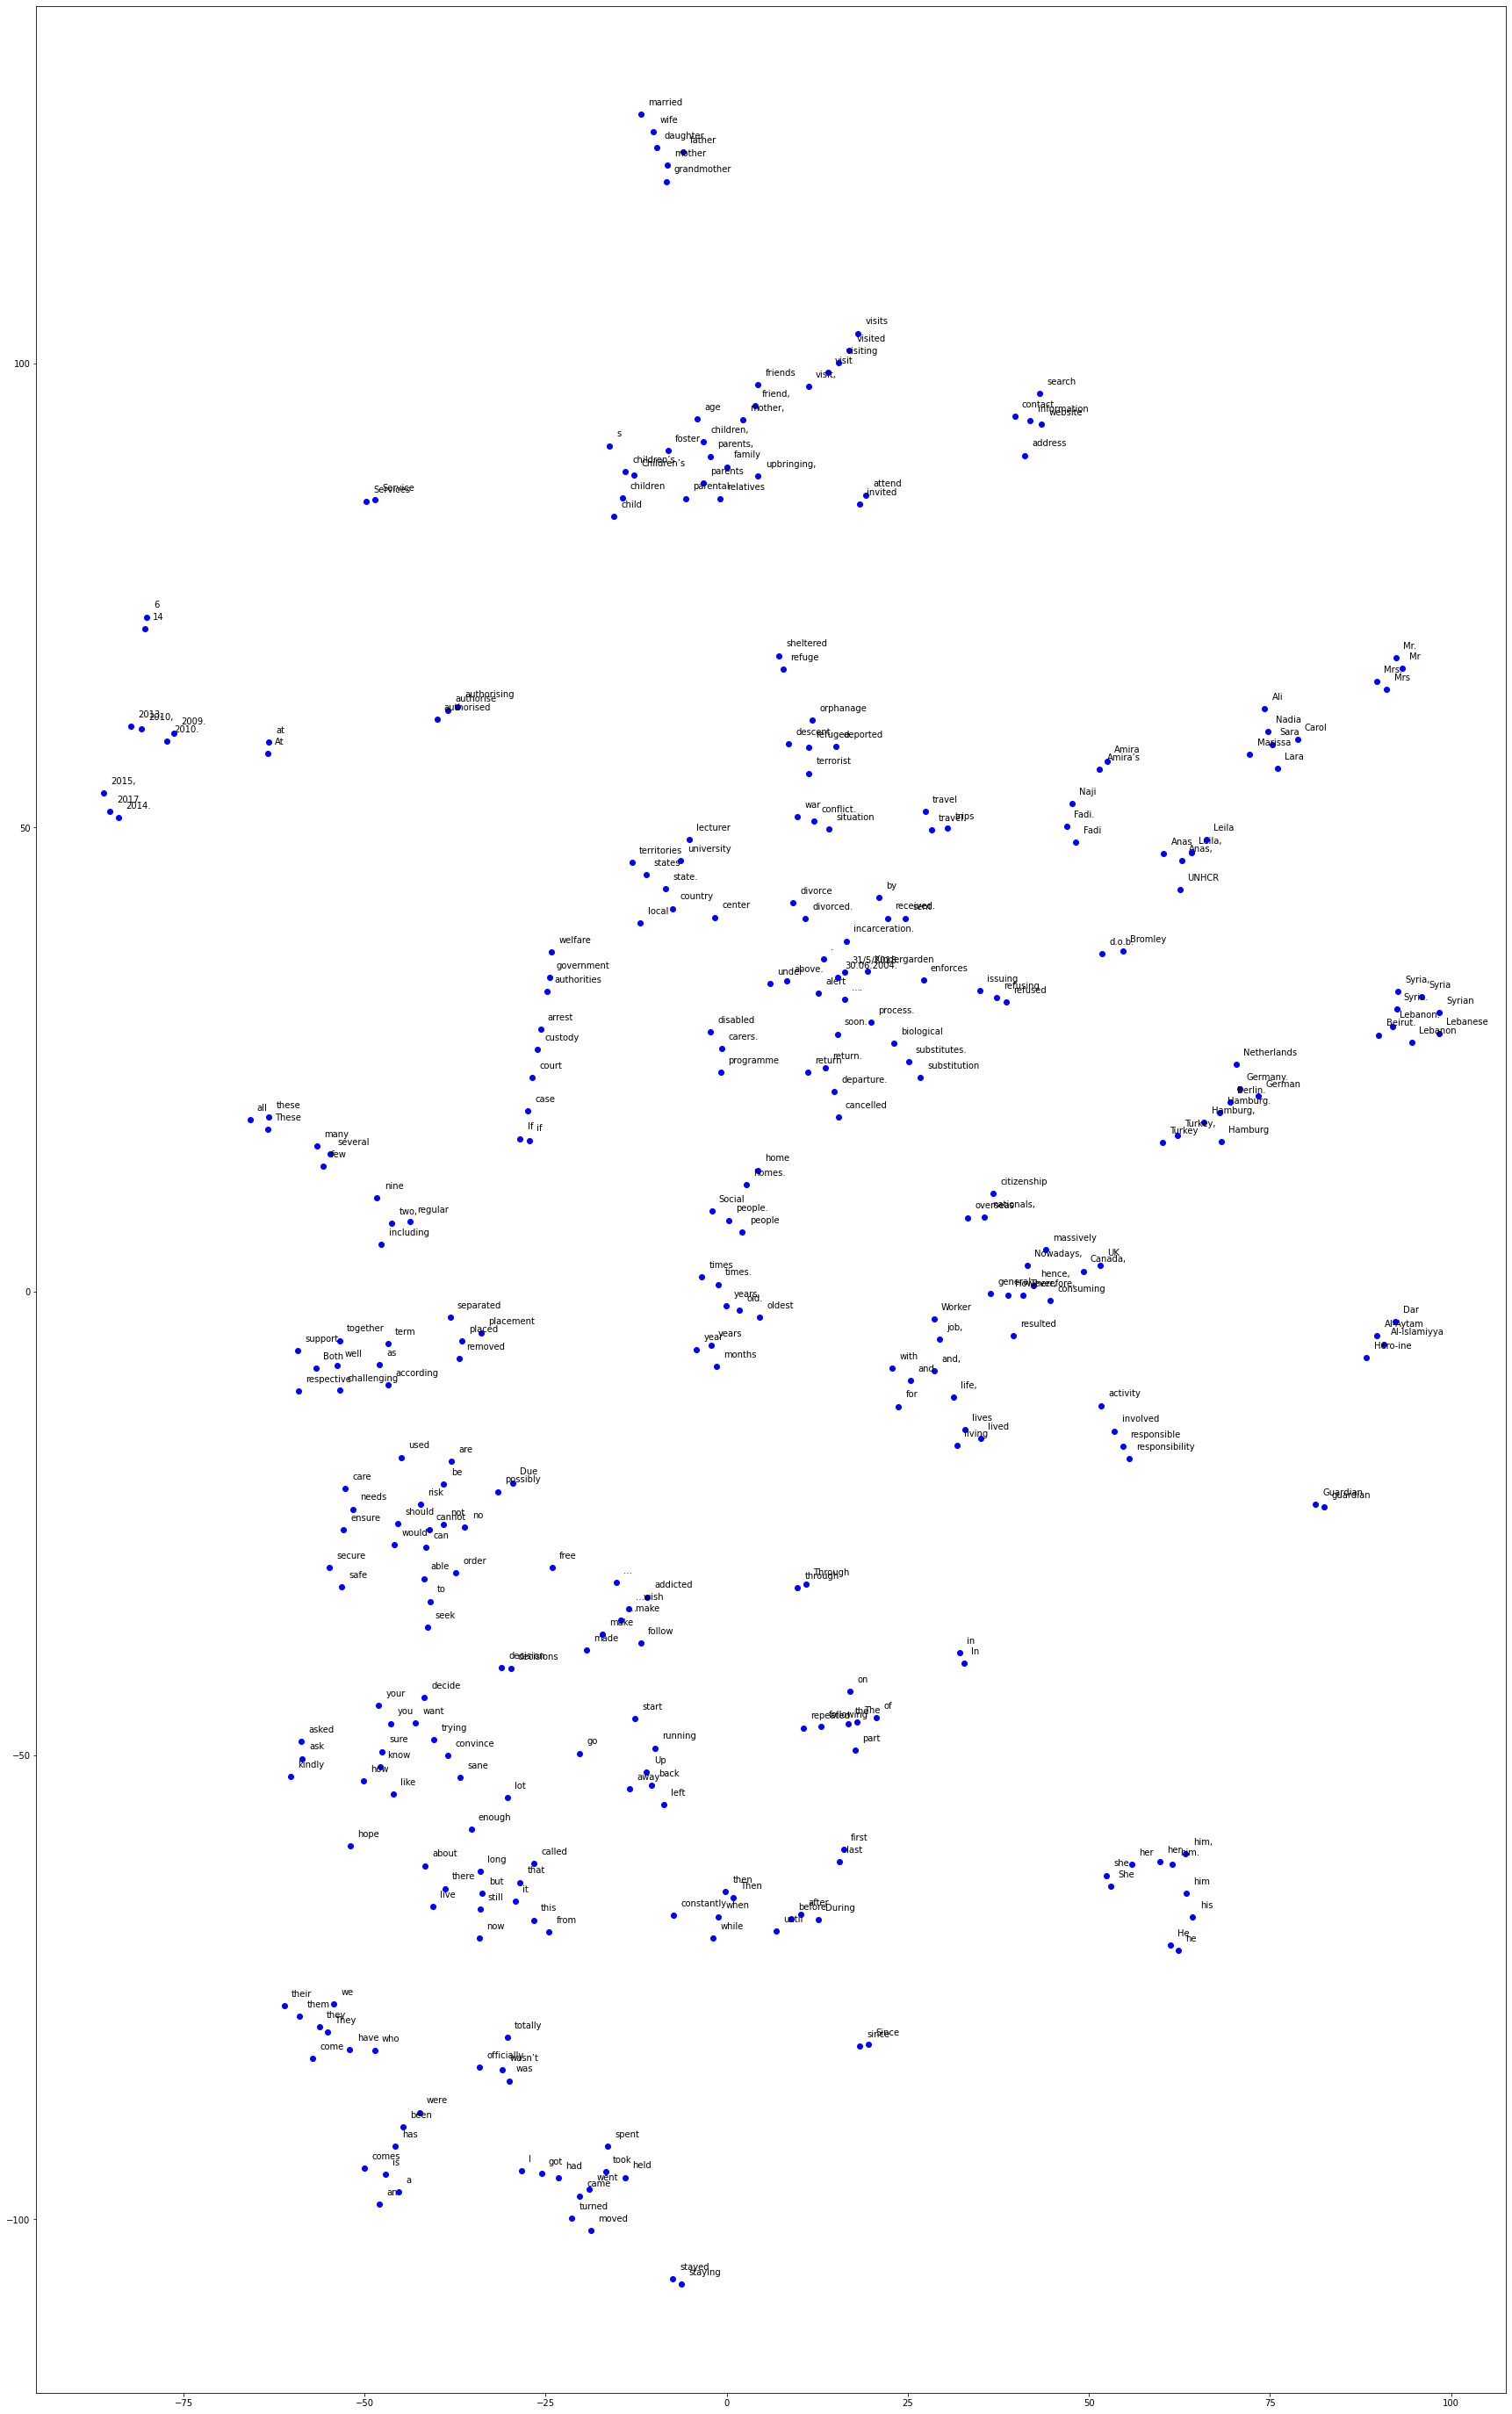

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(30, 50))
plt.scatter(T[:, 0], T[:, 1], c='blue', edgecolors='b')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

**Document Clustering** - KMeans

In [ ]:
# Number of cluster is user defined
from sklearn.cluster import KMeans

doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in background_df['Background information'][:100]])

km = KMeans(n_clusters=2, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([background_df['Background information'][:100], cluster_labels], axis=1)

,Background information,ClusterLabel
0,Amira’s mother left her daughter at an orphana...,1
1,The Social Worker who made the child welfare a...,1
2,I hope you all are well and sane in these chal...,1
3,"Mr. Ali and Mrs. Leila, Syrian nationals, got ...",1
4,Carol and Fadi are in a long term foster place...,0


In [ ]:
nlp2 = spacy.load('en_core_web_sm')

In [ ]:
from spacy import displacy

for sentence in background_df['Background information']:
  sentence_doc = nlp2(sentence)
  
  displacy.render(sentence_doc, style='dep', jupyter=True)
  print('Sentence is: ', sentence_doc)

Sentence is:  Amira’s mother left her daughter at an orphanage in Beirut. The children’s home was called Dar Al-Aytam Al-Islamiyya secure center for people with needs . The first nine years of her life, Amira spent living in children’s homes. At the age of nine she was invited to come to the Netherlands as a refugee. The UNHCR was involved in this process. Nowadays, Amira is living in a sheltered home for disabled people. The biological mother possibly moved to Canada, according to information the UNHCR received. However, we cannot be sure and as there is not a lot of information about mother, we would like to search for the biological mother in Lebanon.


Sentence is:  The Social Worker who made the child welfare alert has been responsible for the family since 2014. The father of Lara and Fadi comes from Lebanon and was deported back to his country in 2017. He had been massively consuming Hero-ine for many years. The mother had been addicted as well since she was 14 years old. She had been in a substitution programme for many years. Since last year she had been free of substitutes. Up until now the children used to attend a Kindergarden in Berlin. These placement s are about to be cancelled soon. The oldest child Marissa is under care of her grandmother and has a Guardian by the state. Through the guardian the grandmother sent the following child welfare alert to the Social Service


Sentence is:  I hope you all are well and sane in these challenging times. I kindly ask you for your support in the case of Anas, d.o.b. 30.06.2004. The mother, Nadia and Anas live in Syria. The father … lives still in Hamburg. The family lived before together in Hamburg, then the parents got divorced. Then mother and child left to Syria in 2009. The father has no contact with the child since 2010. The family court of Hamburg has to decide about the custody and would like to know how is the situation for Anas and mother and if Anas has the German citizenship and if mother and Anas would like to come back to Germany.


Sentence is:  Mr. Ali and Mrs. Leila, Syrian nationals, got married in 2010, 6 months before the start of the war in Syria. In 2013, when their daughter Sara turned two, Mrs. Leila went to Turkey with her and her parents, running away from the Syrian conflict. 
Mr. Ali was a university lecturer in Syria. Due to his job, he wasn’t able to go and live with his family to Turkey, and hence, he visited them few months after their departure. During his visit, he asked his wife Leila to return with him and his daughter to Syria, but she totally refused and asked him for a divorce should he enforces her. 
Mrs. Leila and her daughter stayed in Turkey until 2015, while Mr. Ali has been visiting them several times in order to convince his wife to go back with him. Mrs. Leila held her decision and was constantly refusing to return.
The repeated visits of Mr. Ali to Turkey resulted in issuing a decision by the local Syrian authorities to arrest him, since he left the Syrian territories through Turk

Sentence is:  Carol and Fadi are in a long term foster placement with Mr and Mrs …. Both children were removed from the care of their respective parents and were placed in long term foster care with Mr. and Mrs …. Bromley Children’s Services have parental responsibility for the Carol and Fadi and make decisions about their care and upbringing, including authorising overseas travel. Mr … is of Lebanese descent and, as part of their general family life, Mr and Mrs …make regular trips to visit relatives and family friends in Lebanon. Mr and Mrs …wish to travel to Lebanon with Carol and Fadi. However, information from the UK government website states that there is a risk of terrorist activity in Lebanon. Therefore, Children’s Services in Bromley want to ensure that it is safe enough for the children to travel to Lebanon before they authorise that Carol and Fadi can travel to Lebanon with their foster carers. If they are authorised to travel to Lebanon with the children, Mr and Mrs … would 

In [ ]:
for sentence in background_df['Background information']:
  sentence_doc2 = nlp2(sentence)
  
[(x.text,x.label_) for x in sentence_doc2.ents]

[('Carol and Fadi', 'ORG'),
 ('Mr and Mrs', 'ORG'),
 ('Bromley Children’s Services', 'ORG'),
 ('the Carol and Fadi', 'ORG'),
 ('Lebanese', 'NORP'),
 ('Lebanon', 'GPE'),
 ('Lebanon', 'GPE'),
 ('Carol and Fadi', 'ORG'),
 ('UK', 'GPE'),
 ('Lebanon', 'GPE'),
 ('Children’s Services', 'ORG'),
 ('Bromley', 'GPE'),
 ('Lebanon', 'GPE'),
 ('Carol', 'PERSON'),
 ('Lebanon', 'GPE'),
 ('Lebanon', 'GPE'),
 ('Naji', 'PERSON')]

Here we can see that 'lebanon' is a  Geographical locations (GPE) and 'Bromley Children’s Services' and organization

In [ ]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
# Someone already worked on NER, so check above site for more information
#displacy.render(sentence_doc2, style='ent')

**References**

*   https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28


